# Churn modeling:(This is a segmentation model that is used to segment users into two or more categories)

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
tf.__version__

'2.8.0'

# **Data preprocessing**

In [3]:
dataset=pd.read_csv('/content/Churn_Modelling.csv')
x=dataset.iloc[:,3:-1].values
y=dataset.iloc[:,-1].values


In [4]:
#encoding categorical variables
#label encoding gender

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:,2]=le.fit_transform(x[:,2])


In [5]:
#one hot encoding country fields
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [6]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
#scaling the training set
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

# **Building the ANN**

In [8]:
#intializing the ANN
ann=tf.keras.models.Sequential()

In [9]:
#Adding the input and first hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [10]:
#adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [11]:
#adding an output layer
#for multivariate classification use softmax as acticvation function

#use sigmoid as activation function for bivariarte/binary output
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# **Training the ANN**

In [12]:
!pip install tensor-dash

In [13]:
#compiling the ANN
#this is for bivariate classification
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#use this is for multivariate classification use categorical_crossentropy loss


In [14]:
from tensordash.tensordash import Tensordash
histories=Tensordash(
    ModelName='ann Clasification (chur segmentation)',
    email='dumkaabhipray@gmail.com',
    password='kamalanita1@'
)


In [ ]:
#training the ANN
try:
  ann.fit(x_train,y_train,batch_size=32,epochs=100,callbacks=[histories])
except Exception as e:
  print(e)
  histories.sendCrash()

# **Making the predictions on the trained model**

In [ ]:
#predicting test set results
y_pred=ann.predict(x_test)#this will simply return probablity
y_pred=(y_pred>0.5)#we need to convert probablity to some solid value based on some threshold value
res=np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(res)

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 1]
 [0 1]]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


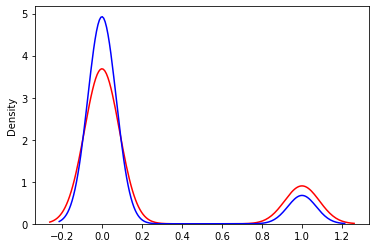

In [ ]:
#visualizing the results
import seaborn as sns
ax1=sns.distplot(y_test,hist=False,color="r",label="actual value")
sns.distplot(y_pred,hist=False,color="b",label="predicted values",ax=ax1)

In [ ]:
#building the confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1549   58]
 [ 210  183]]


0.866

#Cross validating the model using k-fold cross validation

In [ ]:
#need to split data into different sets first
#need to handle the crashed iteration
dataSets=[]
accuracies=[]
for val in range(1,10):
  print(f'this is the {val}th dataset split results')
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=val+7)
  try:
    history=ann.fit(np.asarray(x_train).astype(np.float32), np.asarray(y_train).astype(np.float32),batch_size=32,epochs=100,callbacks=[histories])
    accuracies.append(history)
  except Exception as e:
    print(e)
  histories.sendCrash()

this is the 1th dataset split results
Epoch 1/100
235/235 [==============================] - 1s 3ms/step - loss: 400.8252 - accuracy: 0.6727
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 42.9386 - accuracy: 0.6771
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 32.4326 - accuracy: 0.6897
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 21.5543 - accuracy: 0.6855
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 21.6447 - accuracy: 0.6833
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 18.3453 - accuracy: 0.6829
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 23.2062 - accuracy: 0.6936
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 18.9524 - accuracy: 0.6859
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 18.0107 - accuracy: 0.6837
Epoch 10/100
235/235 [=====================

In [ ]:
def createDataFrames():
  accuracy_Data=[]
  loss_Data=[]
  for history in accuracies:
    accuracy_arr=[]
    accuracy_arr.append(sum(history.history['accuracy']) / len(history.history['accuracy']))
    loss_arr=[]
    loss_arr.append(sum(history.history['loss']) / len(history.history['loss']))
    for accuracy_val, loss_val in zip(history.history['accuracy'],history.history['loss']):
      accuracy_arr.append(accuracy_val)
      loss_arr.append(loss_val)
    
    accuracy_Data.append(accuracy_arr)
    loss_Data.append(loss_arr)
  #creating dataframes from these values
  columns=['mean']
  for i in range(1,101):
    columns.append(f'Epoch{i}')
  index=['CV1','CV2','CV3','CV4','CV5','CV6','CV7','CV8','CV9','CV10']

  #this is the dataframe for accuracies
  accuracy_DF = pd.DataFrame(data=accuracy_Data,index=index,columns=columns)
  accuracy_DF = accuracy_DF.sort_values(by=['mean'],ascending=False)
  #this is the dataframe for losses
  loss_DF = pd.DataFrame(data=loss_Data,index=index,columns=columns)
  loss_DF = loss_DF.sort_values(by=['mean'],ascending=False)

  return {'accuracies':accuracy_DF,'losses':loss_DF}

dfs=createDataFrames()

In [ ]:
#this is the accuracy dataframe
print(dfs['accuracies'])

In [ ]:
#this is the loss dataframe
print(dfs['losses'])

In [ ]:
print(f'This is the mean accuracy of the model after applying 10 cross validations {dfs["accuracies"]["mean"].mean()}')

In [ ]:
print(f'This is the mean loss of the model after applying 10 cross validations {dfs["losses"]["mean"].mean()}')

In [ ]:
#processing the dataset to get a mapping for the categorical values
#this will keep a track of all the encodings that we will be using to preprocess the data that will be fed to the trained model for predictions
preProcess_dataset=pd.read_csv('/content/Churn_Modelling.csv').iloc[:,4:6].values
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
Gender_unique = np.unique(preProcess_dataset[:,1])
Country_unique = np.unique(preProcess_dataset[:,0])


In [ ]:
genderDict={}
for val1,val2 in zip(Gender_unique,le.fit_transform(Gender_unique)):
  genderDict[val1]=val2

In [ ]:
countryDict={}
ct1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
for val1,val2 in zip(preProcess_dataset[:,0],np.array(ct1.fit_transform(preProcess_dataset))):
  countryDict[val1]=val2[:-1]

print(countryDict)

In [ ]:
#writing a function that taken in an input and then gives an output based on the trained model
#in these functions need to apply inverse transformation to the input values to fit model requirements

#pass in the values and use the trained model to predict the results
#using names parameters here
def predictResults(
    RowNumber:int,CustomeId:int,Surname:str,
    CreditScore:int,Geography:str,Gender:'str',
    Age:int,Tenure:int,Balance:float,NumOfProducts:int,
    HasCard:int,IsActiveMember:int,EstimatedSalary:float,):
  featureArr=np.array([CreditScore,countryDict[Geography][0],countryDict[Geography][1],countryDict[Geography][2],genderDict[Gender],
    Age,Tenure,Balance,NumOfProducts,HasCard,IsActiveMember,EstimatedSalary])
  features=st.transform([[CreditScore,countryDict[Geography][0],countryDict[Geography][1],countryDict[Geography][2],genderDict[Gender],
    Age,Tenure,Balance,NumOfProducts,HasCard,IsActiveMember,EstimatedSalary]])
  if ann.predict(features)>0.5:
    return 'will'
  else:
    return 'will not'


result=predictResults(1,15634602	,'Hargrave'	,619,	'France',	'Female'	,42,	2,	0,	1,	1,	1,	101348.88)
print(f'the user {result} leave the firm')